In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import mode
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import tkinter as tk
from tkinter import Canvas, Button, Label
from PIL import Image, ImageDraw
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [3]:
df_train = pd.read_csv('/Users/shivamaniarunachalam/Desktop/python_demo/archive/mnist_train.csv',header = None)
df_test = pd.read_csv('/Users/shivamaniarunachalam/Desktop/python_demo/archive/mnist_test.csv',header = None)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train = df_train.astype('float32')
df_test = df_test.astype('float32')

In [6]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(df_train.shape)
print(df_test.shape)

(60000, 785)
(10000, 785)


In [9]:
#Features - Pixels values of Images
X_train = df_train.drop(0,axis=1).values
X_test = df_test.drop(0,axis=1).values
X_train = np.abs(255 - X_train)
X_test = np.abs(255 - X_test)

#Labels - The labels assigned
y_train = df_train[0].values
y_test = df_test[0].values

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [11]:
im = X_train[0].reshape(28,28)
im

array([[255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255., 255., 255., 255., 255., 255.,
        255., 255., 255., 255., 255., 255.],
       [255., 255., 255., 255., 255

In [12]:
print(y_train[0])

5.0


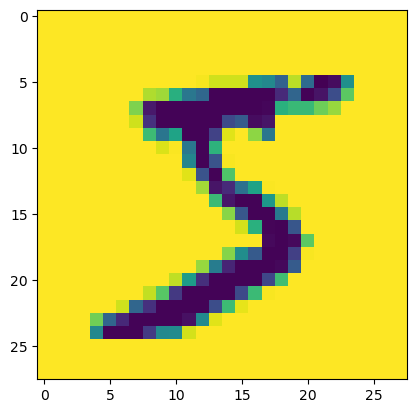

In [13]:
plt.imshow(im)
plt.show()

In [14]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

/Users/shivamaniarunachalam/Desktop/python_demo/env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


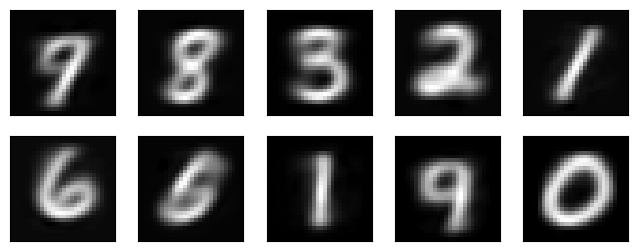

In [15]:
# Use a subset for faster execution
indices = np.arange(len(X_train))
np.random.shuffle(indices)
indices = indices[:10000]
X_subset = X_train[indices]

# Reduce dimensionality for faster computation and better visualization
pca = PCA(n_components=50)
X_reduced = pca.fit_transform(X_subset)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10)
kmeans.fit(X_reduced)

# Visualize the cluster centroids
centroids = kmeans.cluster_centers_
centroids = pca.inverse_transform(centroids)  # Inverse PCA to go back to original space

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = centroids.reshape(10, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

plt.show()

In [20]:
# Predict the cluster labels for the dataset
clusters = kmeans.predict(X_reduced)

# Find the true labels for each cluster
y_int = y_train[indices]  # Convert labels to integers

# Now, use y_int for finding the mode and calculating metrics to avoid the ValueError
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(y_int[mask])[0]

# Compute the accuracy
kaccuracy = accuracy_score(y_int, labels)
print("K-means Results:")
print(f"Accuracy: {kaccuracy}")

# Compute precision, recall, and F1-score
kprecision, krecall, kf1, _ = precision_recall_fscore_support(y_int, labels, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

K-means Results:
Accuracy: 0.5801
Precision: 0.9595693857249298
Recall: 0.9592
F1 Score: 0.9590981148067523


/Users/shivamaniarunachalam/Desktop/python_demo/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
np.random.seed(24)

# It's a good practice to scale features before using KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='manhattan')

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # Use 5-fold cross-validation

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# Fit the model to the training data
knn.fit(X_train_scaled, y_train)

# Predict labels for the test set
y_pred = knn.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
print("KNN Results:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Cross-Validation Scores: [0.95983333 0.95966667 0.95716667 0.95841667 0.96133333]
Mean CV Score: 0.9592833333333333
KNN Results:
Accuracy: 0.9592
Precision: 0.9595693857249298
Recall: 0.9592
F1 Score: 0.9590981148067523


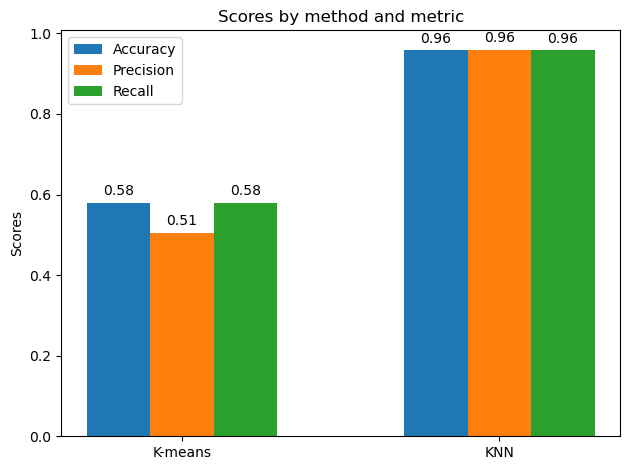

In [21]:
# Accuracy, Precision, and Recall values for K-means and KNN
metrics = {
    "K-means": {"Accuracy": kaccuracy, "Precision": kprecision, "Recall": krecall},
    "KNN": {"Accuracy": accuracy, "Precision": precision, "Recall": recall}
}

# Extracting values for plotting
methods = list(metrics.keys())
accuracies = [metrics[method]["Accuracy"] for method in methods]
precisions = [metrics[method]["Precision"] for method in methods]
recalls = [metrics[method]["Recall"] for method in methods]

# Creating the plot
x = range(len(methods))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracies, width, label='Accuracy')
rects2 = ax.bar([p + width for p in x], precisions, width, label='Precision')
rects3 = ax.bar([p + width * 2 for p in x], recalls, width, label='Recall')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by method and metric')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(methods)
ax.legend()

# Function to auto-label the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [ ]:
#GUI
np.random.seed(24)

# It's a good practice to scale features before using KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3, weights='distance', metric='manhattan')

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)  # Use 5-fold cross-validation

knn.fit(X_train_scaled, y_train)

class DigitRecognizerApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Digit Recognizer")
        
        self.canvas = Canvas(self, width=200, height=200, bg='white', bd=2, relief=tk.RAISED,cursor="cross")
        self.canvas.pack(pady=10)
        
        self.predict_button = Button(self, text="Predict", command=self.predict_digit)
        self.predict_button.pack(side=tk.LEFT, padx=10)
        self.clear_button = Button(self, text="Clear", command=self.clear_canvas)
        self.clear_button.pack(side=tk.LEFT, padx=10)
        
        self.prediction_label = Label(self, text="Prediction: ", font=("Helvetica", 16))
        self.prediction_label.pack(pady=10)
        
        self.image = Image.new("L", (200, 200), "white")
        self.draw = ImageDraw.Draw(self.image)
        
        self.canvas.bind("<B1-Motion>", self.draw_on_canvas)
        
    def draw_on_canvas(self, event):
        x, y = event.x, event.y
        r = 8
        self.canvas.create_oval(x-r, y-r, x+r, y+r, fill="black")
        self.draw.ellipse([x-r, y-r, x+r, y+r], fill="black")
        
    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("L", (200, 200), "white")
        self.draw = ImageDraw.Draw(self.image)
        self.prediction_label.config(text="Prediction: ")
        
    def predict_digit(self):
        img_resized = self.image.resize((28, 28))
        img_array = np.array(img_resized).reshape(1, -1)
        img_array = img_array.flatten() / 255.0
        img_array = scaler.transform([img_array])
        
        prediction = knn.predict(img_array)
        self.prediction_label.config(text=f"Prediction: {prediction[0]}")

# Create and run the GUI application
app = DigitRecognizerApp()
app.mainloop()